In [8]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial as sp

import matrices.loading as mload

plt.rcParams["figure.figsize"] = (12,12)

data_path = "resources/aminer/v1" # 629814 documents

In [9]:
csr_matrix_jaccard = mload.load_matrix_jaccard_sim(data_path) # 998 documents sample
print(csr_matrix_jaccard.ndim, csr_matrix_jaccard.shape)

Loading saved matrix ...
2 (998, 998)


In [10]:
csr_matrix_word2vec = mload.load_matrix_word2vec_sim(data_path) # 998 documents sample
print(csr_matrix_word2vec.ndim, csr_matrix_word2vec.shape)

Loading saved matrix ...
2 (998, 998)


In [11]:
csr_matrix_jaccard_dis = 1 -csr_matrix_jaccard

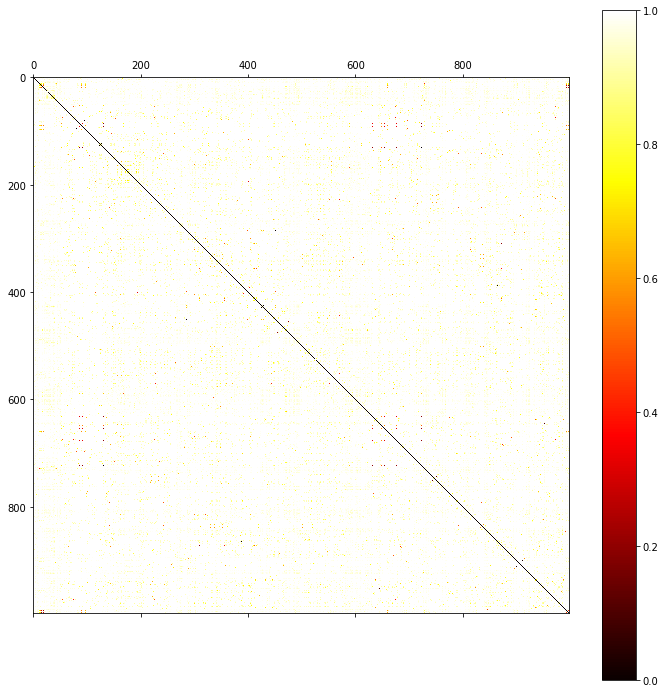

In [12]:
plt.matshow(csr_matrix_jaccard_dis, cmap='hot', vmin=0, vmax=1)
plt.colorbar()

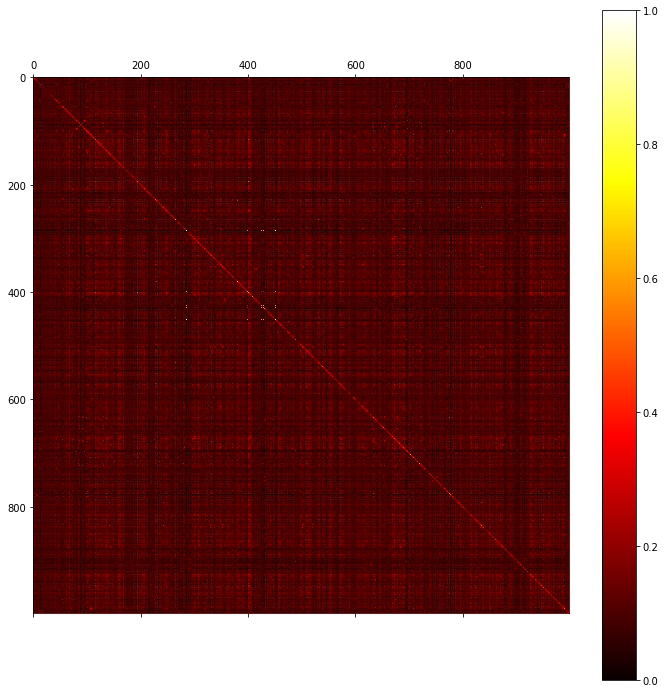

In [13]:
plt.matshow(csr_matrix_word2vec, cmap='hot', vmin=0, vmax=1)
plt.colorbar()

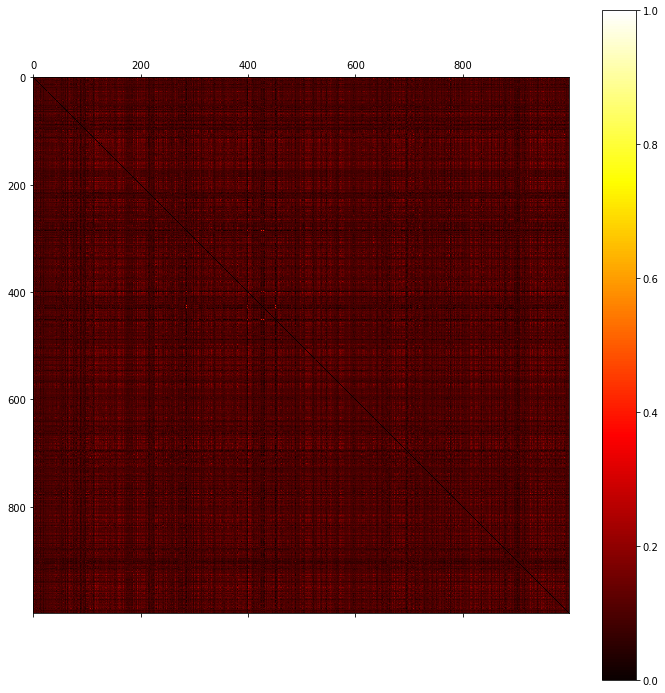

In [14]:
plt.matshow(np.multiply(csr_matrix_word2vec, csr_matrix_jaccard_dis), cmap='hot', vmin=0, vmax=1)
plt.colorbar()